<a href="https://colab.research.google.com/github/nataliapazin/Redes_Neurais_2021/blob/main/14_04_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# bibliotecas usadas
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from google.colab import files

In [ ]:
# para gerar o grafico no browser
%matplotlib inline

In [ ]:
!git clone https://github.com/nataliapazin/Redes_Neurais_2021
%cd Redes_Neurais_2021

Cloning into 'Redes_Neurais_2021'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 4), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.
/content/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021/Redes_Neurais_2021


In [ ]:
# leitura dos dados
df=pd.read_csv("Hydrofoil_ago_29_2018.csv")
#DAT=pd.read_csv("Hydrofoil_ago_29_2018.csv",index_col="emit")

In [ ]:
df.head(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,1,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,2,2,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,3,3,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [ ]:
df.tail(3)

,Unnamed: 0,Case,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,57,57,4,2.074661,274.586200,98.242317,2.955929,2048.288760
57,58,58,4,2.157647,291.257505,98.290939,2.932024,2259.555115
58,59,59,4,2.240634,286.354180,104.693695,2.979833,2306.958369


In [ ]:
# separa as colunas de interesse (filtrar)
'''
Index=[2,3,4,5,6,7]
Dat_Select=[]
Dat_Select=df.iloc[:,Index].copy()
'''

'\nIndex=[2,3,4,5,6,7]\nDat_Select=[]\nDat_Select=df.iloc[:,Index].copy()\n'

In [ ]:
Dat_Select=df.iloc[:,2:]

In [ ]:
Dat_Select.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
0,1,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,0.103733,2.549729,-0.689028,1.353022,0.950991
2,1,0.124480,3.628461,-0.835413,1.346323,1.624000


In [ ]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
        #x[i]=0.8*(x[i]-min_x)/(max_x-min_x)+0.1
    return x

In [ ]:
# funcao retorna os dados a forma original
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [ ]:
# separa os dados em normatizados e originais
DAT_OLD=[]
DAT_OLD=Dat_Select.copy()
DAT=Normatiza(Dat_Select)

In [ ]:
DAT.tail(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
56,1.0,0.728608,0.458333,0.883962,0.180864,0.260444
57,1.0,0.797753,0.546875,0.884836,0.171315,0.390449
58,1.0,0.866897,0.520833,1.000000,0.190414,0.419620


In [ ]:
# separa os dados em treino e teste
train=DAT.sample(frac=0.8,random_state=None) # poderia ser frac=0.5? sim ou nao?
test=DAT.drop(train.index)

In [ ]:
train.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
22,-0.333333,-0.135696,-0.057292,-0.090369,0.606437,-0.592607
12,-1.000000,0.382887,0.395833,0.444609,1.000000,-0.034860
26,-0.333333,0.555748,0.442708,0.642230,0.409505,0.122245


In [ ]:
test.head(3)

,Hydrofoil,Froude,Resistence,Sinkage,Trim,Power
3,-1.0,-0.861711,-0.966146,-0.916618,-0.456079,-0.997659
8,-1.0,-0.308557,-0.183333,-0.432939,0.709855,-0.717661
13,-1.0,0.555748,0.510417,0.578270,0.966493,0.174914


In [ ]:
# obtem as variaveis independentes (treino e teste)
x_train=train.iloc[:,[0,1]]
x_test=test.iloc[:,[0,1]]
X_OLD=DAT_OLD.iloc[:,[0,1]]

In [ ]:
# obtem a dependente potência (treino e teste)
Index=[5]
y_train=train.iloc[:,Index]
y_test=test.iloc[:,Index]
Y_OLD=DAT_OLD.iloc[:,Index]

In [ ]:
# define a rede neural 
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(9, 8),random_state=1)

In [ ]:
# treina a rede neural
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(9, 8), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(x_train)
y_calc_test=model.predict(x_test)

In [ ]:
# transforma a saida da rede em dataframe 
y_calc_train=pd.DataFrame(y_calc_train)
y_calc_test=pd.DataFrame(y_calc_test)
col_names=list(y_train)
y_calc_train.columns = col_names
y_calc_test.columns = col_names

In [ ]:
# transforma dos dados calculados na forma original (nao normatizado)
y_calc_train=Original(y_calc_train,Y_OLD)
y_calc_test=Original(y_calc_test,Y_OLD)

In [ ]:
# recupera os dados originais 
test=[]
train=[]
train=Original(y_train,Y_OLD)
test=Original(y_test,Y_OLD)

In [ ]:
train

,Power
22,662.036189
12,1568.403965
26,1823.708528
58,2306.958369
25,1439.654386
16,3239.950973
20,306.146017
49,443.308210
28,2384.793342
17,0.000000


In [ ]:
# escolhe uma das resposta para fazer o grafico (resistencia-treino)
resist_obs_train=[]
resist_calc_train=[]
resist_calc_train=y_calc_train['Power'].copy()
resist_obs_train=train['Power'].copy()

In [ ]:
# escolhe uma das resposta para fazer o grafico (resistencia-teste)
resist_obs_test=[]
resist_calc_test=[]
resist_calc_test=y_calc_test['Power'].copy()
resist_obs_test=test['Power'].copy()

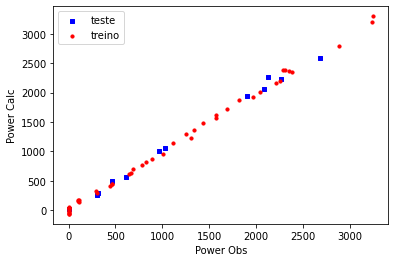

In [ ]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(resist_obs_test,resist_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(resist_obs_train,resist_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
plt.ylabel('Power Calc')
plt.xlabel('Power Obs')
plt.show()

In [ ]:
mse=mean_squared_error(resist_obs_test,resist_calc_test)
print("MSE teste=",mse)
R2=r2_score(resist_obs_test,resist_calc_test)
print("R^2 teste=",R2)

MSE teste= 3274.186797685221
R^2 teste= 0.9958597912897267


In [ ]:
mse=mean_squared_error(resist_obs_train,resist_calc_train)
print("MSE treino=",mse)
R2=r2_score(resist_obs_train,resist_calc_train)
print("R^2 treino=",R2)

MSE treino= 1960.6351861654564
R^2 treino= 0.9979299677885995
